In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os
import seaborn as sns
from process_data_for_knn import process_dataset_for_knn
from utils import  is_array_col

In [ ]:
sns.set_style('darkgrid')

In [91]:
dataset_path_processed = Path(r'C:\Users\samme\Google_Drive\Code_library\MIR_Pipeline_Project\processed_data/data_processed_1000_1000000.0.csv')
dataset_path_raw = Path(r'C:\Users\samme\Google_Drive\Code_library\MIR_Pipeline_Project\processed_data\dataTest1000_raw.csv')
df_raw = pd.read_csv(dataset_path_raw)
df_processed = pd.read_csv(dataset_path_processed)
df_knn, exclude, scaler, array_columns, array_lengths  =  process_dataset_for_knn(dataset_path_processed)


In [ ]:

def make_hists(feature_name,df_raw,df_processed):
#Take out large outliers for better visualization
    df_raw = df_raw[(df_raw[feature_name]<=df_raw[feature_name].quantile(0.99))]
    df_raw = df_raw[(df_raw[feature_name]>=df_raw[feature_name].quantile(0.009))]
    df_processed = df_processed[(df_processed[feature_name]<=df_processed[feature_name].quantile(0.99))]
    df_processed = df_processed[(df_processed[feature_name]>=df_processed[feature_name].quantile(0.009))]
    print(f"Min max before:{df_raw[feature_name].min()},{df_raw[feature_name].max()}")
    print(f"Min max after:{df_processed[feature_name].min()},{df_processed[feature_name].max()}")
    

    for df,title in zip([df_raw,df_processed],['For non preprocessed shapes','For preprocessed shapes']):
        plt.hist(df[feature_name])
        plt.xlabel(feature_name)
        plt.ylabel('Shape count')
        plt.title(title)
        #plt.savefig(r'C:\Users\samme\Google_Drive\Code_library\MIR_Pipeline_Project\graphs/hist_before.png',dpi=600)
        plt.show()

In [ ]:
make_hists('n_triangles',df_raw,df_processed)

In [ ]:
make_hists('volume',df_raw,df_processed)

In [ ]:
make_hists('surface_area',df_raw,df_processed)

In [ ]:
make_hists('eccentricity',df_raw,df_processed)

In [ ]:
make_hists('bounding_box_ratio',df_raw,df_processed)

In [85]:
def plot_distributions(array_name,df_knn,array_columns,n_classes=5):
    relevant_cols = [x for x in df_knn.columns if is_array_col(array_columns,x)==array_name ]

    for class_name, n_occurences in list(df_knn['classification'].value_counts().items())[0:n_classes]:
        df = df_knn[df_knn['classification']==class_name]
        for index, row in df.iterrows():
            y= row[relevant_cols].values
            x= range(0,len(y))
            plt.plot(x,y)
        plt.xlabel('Bins')
        plt.ylabel('Value')
        plt.title(class_name)
        plt.show()
        

        
        


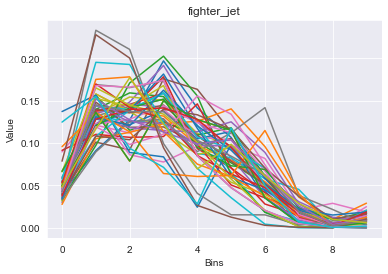

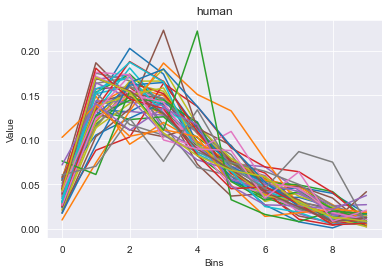

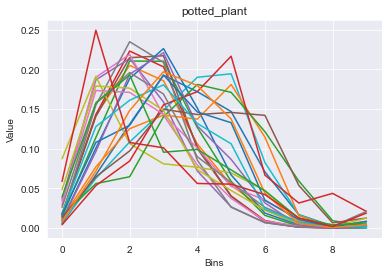

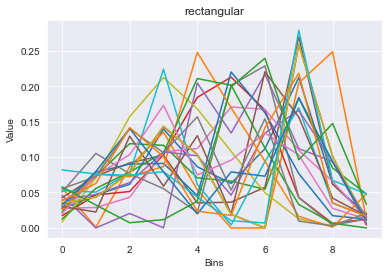

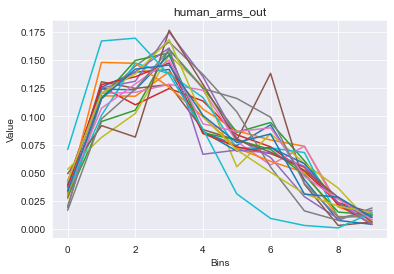

In [92]:
plot_distributions('two_vertices',df_knn,array_columns,n_classes=5)